In [1]:
import sklearn
sklearn.__version__

'0.19.2'

In [12]:
# Generate sample data
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

In [15]:
np.random.seed(0)

# an array of the given shape and populate it with random samples from a 
# uniform distribution over [0, 1)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
X[:5]

array([[0.093949  ],
       [0.10109199],
       [0.35518029],
       [0.4356465 ],
       [0.59137213]])

In [16]:
y = np.sin(X).ravel()
y

array([ 0.09381086,  0.10091989,  0.34775941,  0.4219966 ,  0.55750066,
        0.65695022,  0.96940081,  0.94059723,  0.87637482,  0.8538402 ,
        0.81553704,  0.75839099,  0.74075654,  0.50756044,  0.47689441,
        0.40518094,  0.38713765,  0.29682859,  0.29496884,  0.12742837,
        0.08102512,  0.05689193,  0.05338977, -0.05797992, -0.08776485,
       -0.26432971, -0.42082464, -0.66655347, -0.68104667, -0.68968448,
       -0.72911815, -0.75404581, -0.85289554, -0.93507411, -0.96803456,
       -0.99643995, -0.99997983, -0.99993999, -0.99439521, -0.98371764])

In [18]:
# pick every jth element starting from ith element
# y[i::j]
y[::10]

array([ 0.09381086,  0.81553704,  0.08102512, -0.72911815])

In [7]:
np.random.rand(8)

array([0.3595079 , 0.43703195, 0.6976312 , 0.06022547, 0.66676672,
       0.67063787, 0.21038256, 0.1289263 ])

In [19]:
# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

#### newaxis of numpy

In [22]:
# 1D array
arr = np.arange(4)
print(arr.shape)
arr

(4,)


array([0, 1, 2, 3])

In [23]:
# make it as row vector by inserting an axis along first dimension
row_vec = arr[np.newaxis, :]
print(row_vec.shape)
row_vec

(1, 4)


array([[0, 1, 2, 3]])

In [24]:
# make it as column vector by inserting an axis along second dimension
col_vec = arr[:, np.newaxis]
print(col_vec.shape)
col_vec

(4, 1)


array([[0],
       [1],
       [2],
       [3]])

back to the code ...

In [25]:
# random test point
test = np.linspace(0, 5, 500)[:, np.newaxis]


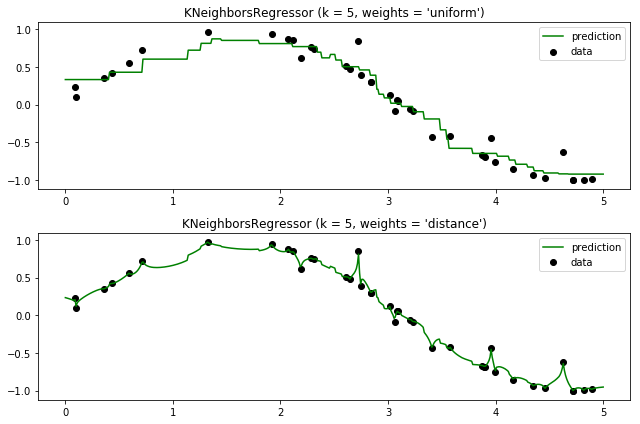

In [26]:
# Fit regression model
plt.figure(figsize=(9,6))
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    
    y_ = knn.fit(X, y).predict(test)

    plt.subplot(2, 1, i + 1)
    
    plt.scatter(X, 
                y, 
                c='k', 
                label='data')
    
    plt.plot(test, 
             y_, 
             c='g', 
             label='prediction')
    
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()